In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv("C:/Users/Naman/Downloads/titanic/train.csv")

In [3]:
df_test=pd.read_csv("C:/Users/Naman/Downloads/titanic/test.csv")

In [4]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [6]:
df_train.shape

(891, 12)

In [7]:
df_test.shape

(418, 11)

In [8]:
#finding missing value 
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

# Exploratory Data Analysis

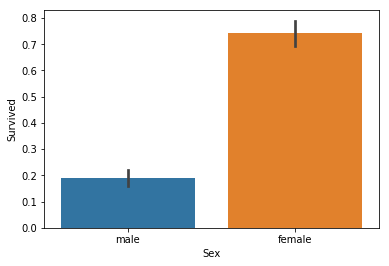

In [10]:
sns.barplot(x="Sex",y="Survived", data= df_train)

In [11]:
#most of the females survived in comparison to males

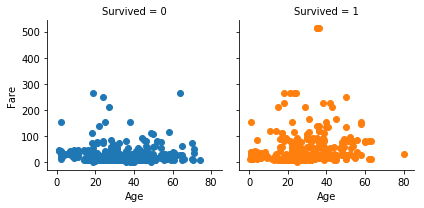

In [12]:
g=sns.FacetGrid(df_train, col="Survived", hue="Survived")
g.map(plt.scatter, "Age", "Fare") # Plots


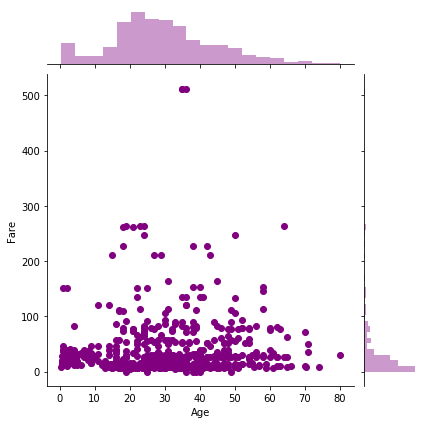

In [13]:
sns.jointplot("Age", "Fare", df_train, color="purple")

C:\Users\Naman\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Naman\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Naman\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Naman\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


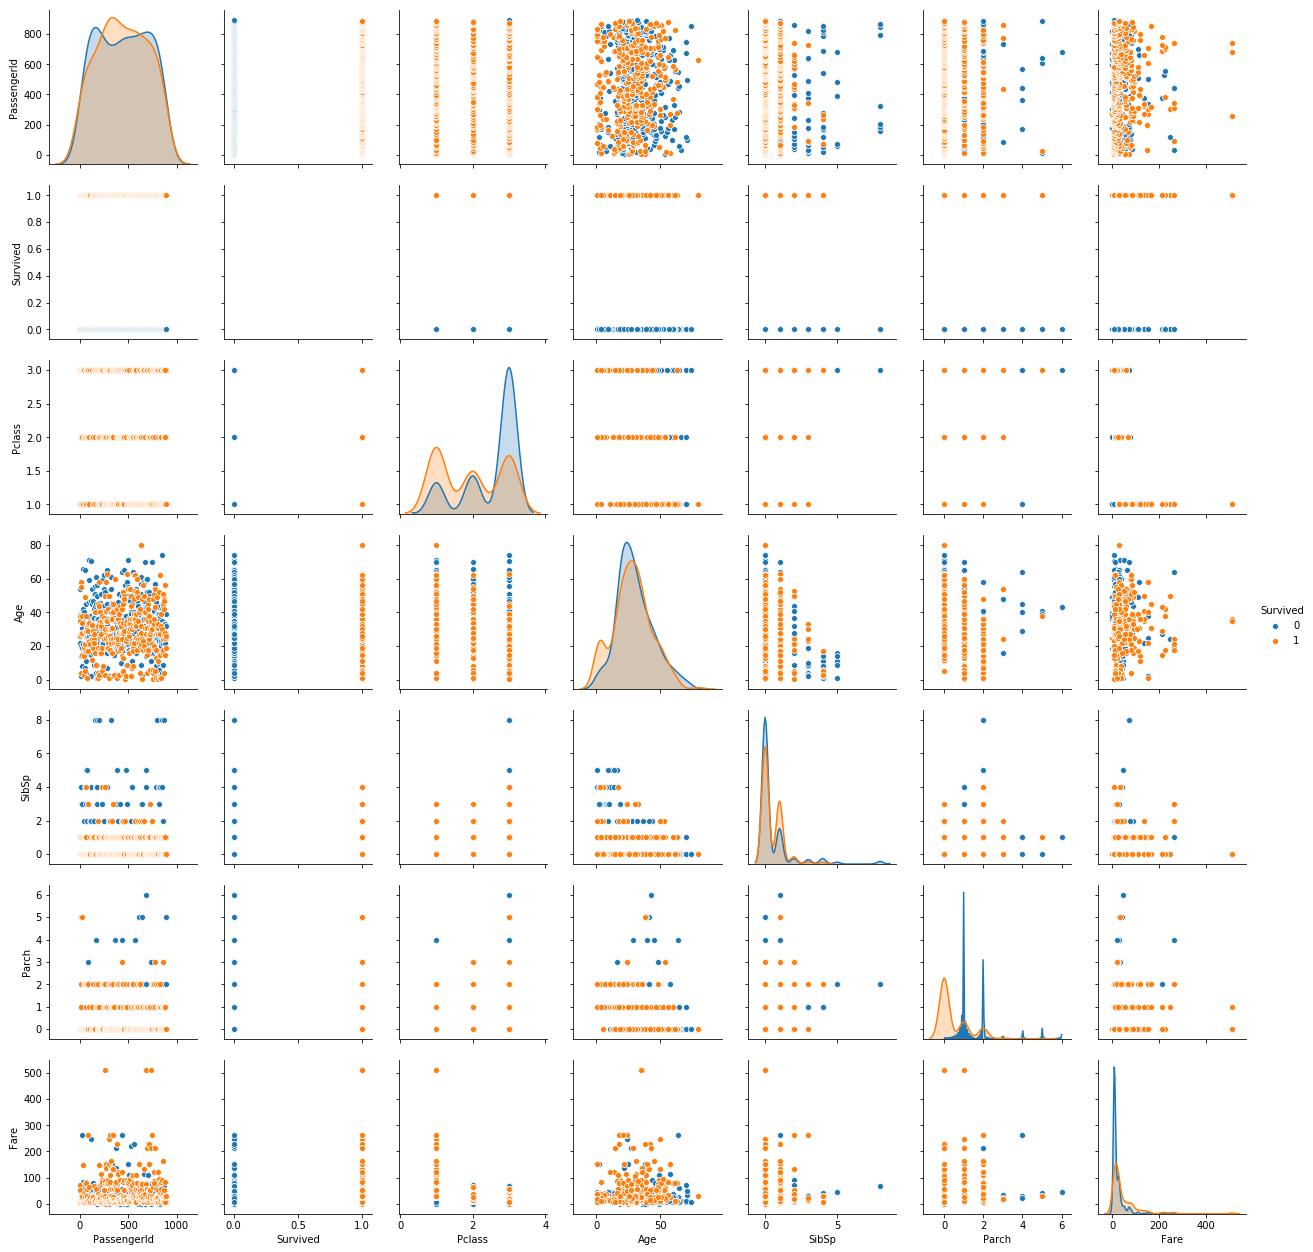

In [14]:
sns.pairplot(df_train, hue="Survived")

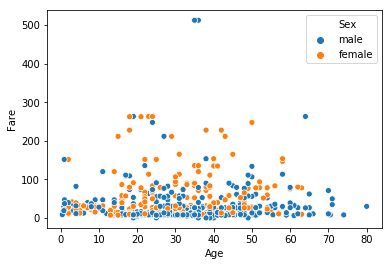

In [15]:
sns.scatterplot("Age","Fare", data=df_train, hue="Sex")

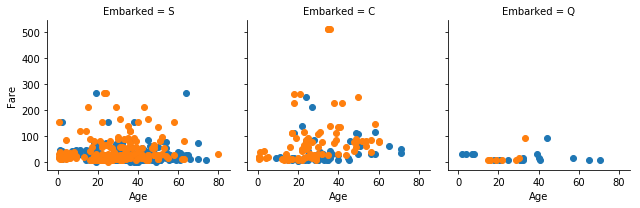

In [16]:
s = sns.FacetGrid(df_train, col="Embarked", hue="Survived")
s.map(plt.scatter, "Age", "Fare")

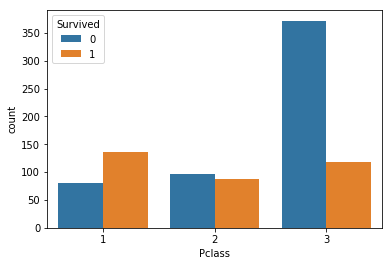

In [17]:
sns.countplot(x = "Pclass", data=df_train, hue="Survived")

C:\Users\Naman\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


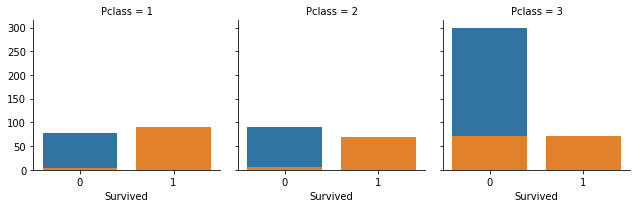

In [18]:
h = sns.FacetGrid(df_train, col="Pclass", hue="Sex")
h.map(sns.countplot, "Survived")

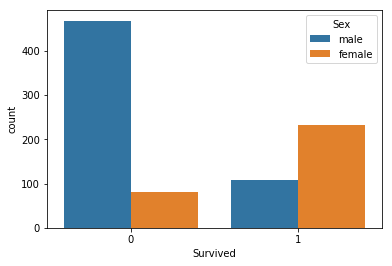

In [19]:
sns.countplot(x = "Survived", hue = "Sex", data=df_train)

In [20]:
print(df_train["Age"].mean())
print(df_train["Age"].median())

29.69911764705882
28.0


In [21]:
df_train["Age"]=df_train["Age"].fillna(28)

In [22]:
df_test["Age"]=df_test["Age"].fillna(27) #imputed value in test data set

In [23]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

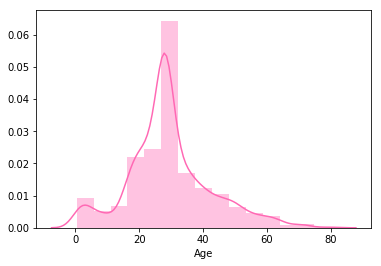

In [24]:
sns.distplot(df_train["Age"], color="hotpink", bins =15)

In [25]:
df_train["Embarked"].mode() # SouthHampton appears the Most


0    S
dtype: object

In [26]:
df_train["Embarked"] = df_train["Embarked"].fillna("S") # Filing the Missing Value using Mode()


In [27]:
df_test["Fare"].median()
df_test["Fare"]=df_test["Fare"].fillna(14.452)

In [28]:
df_train["Cabin"] = df_train["Cabin"].fillna("N") # Created a Dummy Variable


In [29]:
df_test["Cabin"] = df_test["Cabin"].fillna("N") # Created a Dummy Variable


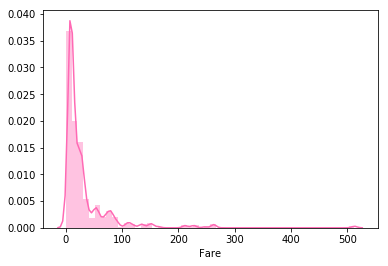

In [30]:
sns.distplot(df_train["Fare"], color="hotpink") # Highly Skewed:: Fare is always skewed in Nature


In [31]:
df_train.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500     N        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250     N        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500     N        S

In [32]:
df_train[df_train["Pclass"]==1]["Fare"].median()

60.287499999999994

In [33]:
df_train["Family"] =df_train["SibSp"]+df_train["Parch"]+1


In [34]:
df_test["Family"] =df_test["SibSp"]+df_test["Parch"]+1


In [35]:
df_test.head()


PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Family  
0  34.5      0      0   330911   7.8292     N        Q       1  
1  47.0      1      0   363272   7.0000     N        S       2  
2  62.0      0      0   240276   9.6875     N        Q       1  
3  27.0      0      0   315154   8.6625     N        S       1  
4  22.0      1      1  3101298  12.2875     N        S       3

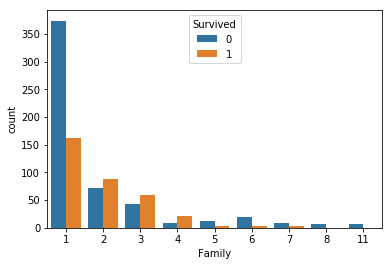

In [36]:
sns.countplot(x = "Family", hue="Survived", data=df_train)


In [37]:
newdf = df_train.copy


In [38]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Family  
0      0         A/5 21171   7.2500     N        S       2  
1      0          PC 17599  71.2833   C85        C       2  
2      0  STON/O2. 3101282   7.9250     N        S       1  
3      0            113803  53.1000  C123        S       2  
4      0            373450   8.0500     N        S       1

In [39]:
# Extracting the Titles from the TEST
names_train = df_train.Name.apply(lambda x: x.split(", ")[-1])
# Applying Split - Cleansing the Titles
titles_train = names_train.apply(lambda x: x.split(". ")[0])
# Finding the Unique Title Values
titles_train.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [40]:
titles_ignore = ['Don', 'Rev', 'Dr', 'Mme',"Dona"
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer']

In [41]:
df_train["Titles"] = titles_train
df_train.Titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [42]:
df_train.Titles = titles_train.replace(to_replace=titles_ignore, value="Others")
df_train.Titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others', 'Ms', 'Major'],
      dtype=object)

In [43]:
df_train.Titles = df_train.Titles.replace(to_replace="Major", value = "Others")
df_train.Titles.unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Others', 'Ms'], dtype=object)

In [44]:
names = df_test.Name.apply(lambda x: x.split(", ")[-1])

In [45]:
names

0                                           Mr. James
1                            Mrs. James (Ellen Needs)
2                                  Mr. Thomas Francis
3                                          Mr. Albert
4                  Mrs. Alexander (Helga E Lindqvist)
5                                    Mr. Johan Cervin
6                                          Miss. Kate
7                                  Mr. Albert Francis
8                    Mrs. Joseph (Sophie Halaut Easu)
9                                     Mr. John Samuel
10                                           Mr. Ylio
11                                Mr. Charles Cresson
12              Mrs. John Pillsbury (Nelle Stevenson)
13                                       Mr. Benjamin
14     Mrs. Herbert Fuller (Carrie Constance Toogood)
15                 Mrs. Sebastiano (Argenia Genovesi)
16                                         Mr. Daniel
17                                         Mr. Gerios
18                          

In [46]:
titles = names.apply(lambda x: x.split(". ")[0])

In [47]:
titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [48]:
df_test["Titles"] = titles


In [49]:
df_test.Titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [50]:
# Replacing the titles with Others
df_test.Titles = titles.replace(to_replace=titles_ignore, value="Others")
df_test.Titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Others', 'Dona'],
      dtype=object)

In [51]:
df_test.Titles = df_test.Titles.replace(to_replace="Dona", value = "Others")
df_test.Titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Others'], dtype=object)

In [52]:
print(df_train.columns)
print(df_test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family', 'Titles'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family', 'Titles'],
      dtype='object')


In [53]:
df_train = df_train.drop("PassengerId", axis = 1)
df_train = df_train.drop("Name", axis = 1)
df_train = df_train.drop("Cabin", axis=1)
df_test = df_test.drop("Cabin", axis =1)
df_train = df_train.drop("Ticket", axis = 1)
df_test = df_test.drop("Ticket", axis =1)
df_test = df_test.drop("Name", axis = 1)

In [54]:
newtrain = pd.get_dummies(df_train)
newtest = pd.get_dummies(df_test)


In [55]:
print(newtrain.columns)
print(newtest.columns)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Titles_Master', 'Titles_Miss', 'Titles_Mr', 'Titles_Mrs', 'Titles_Ms',
       'Titles_Others'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Titles_Master', 'Titles_Miss', 'Titles_Mr', 'Titles_Mrs', 'Titles_Ms',
       'Titles_Others'],
      dtype='object')


In [56]:
x = newtrain.drop("Survived", axis=1)
y = newtrain["Survived"]

In [57]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
pip install xgboost==0.82

Note: you may need to restart the kernel to use updated packages.


In [60]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = .30, random_state = 123)

In [61]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
xgbo = XGBClassifier()
gbm = GradientBoostingClassifier()

In [62]:
model_lg = lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
accuracy_score(y_test, pred_lg)

C:\Users\Naman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8395522388059702

In [63]:
model_tree = tree.fit(x_train, y_train)
pred_tree = tree.predict(x_test)
accuracy_score(y_test, pred_tree)






0.7947761194029851

In [64]:
model_rf = rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
accuracy_score(y_test, pred_rf)

C:\Users\Naman\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8059701492537313

In [65]:
model_ada = ada.fit(x_train, y_train)
pred_ada = ada.predict(x_test)
accuracy_score(y_test, pred_ada)

0.8395522388059702

In [66]:
model_gbm = gbm.fit(x_train, y_train)
pred_gbm = gbm.predict(x_test)
accuracy_score(y_test, pred_gbm)


0.8432835820895522

In [70]:
model_xgbo = xgbo.fit(x_train, y_train)
pred_xgbo = xgbo.predict(x_test)
accuracy_score(y_test, pred_xgbo)

0.8470149253731343

In [71]:
from sklearn.ensemble import VotingClassifier
v = VotingClassifier(estimators=[("Logreg", lg),("Trees", tree),("RF", rf), ("ADA", ada),("XG", xgbo), ("GBM", gbm)])

In [72]:
newmodel_vc = v.fit(x_train, y_train)
newmodel_pred = v.predict(x_test)
accuracy_score(y_test, newmodel_pred)

C:\Users\Naman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8432835820895522

In [73]:
newtest = newtest.drop("PassengerId", axis =1)


In [74]:
m = v.fit(x,y)
pred = v.predict(newtest)

C:\Users\Naman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [75]:
newtest["Survived"] = pred


In [76]:
PassengerID = df_test["PassengerId"].values.tolist()
Prediction = newtest["Survived"].values.tolist()
d = {"PassengerId":PassengerID, "Survived":Prediction}

In [77]:
solution = pd.DataFrame(data=d)
solution.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

In [78]:
solution.to_csv("~/Downloads/votting.csv", index=False)

In [79]:
newtest = newtest.drop("Survived", axis =1)


In [80]:
m = rf.fit(x,y)


In [81]:
pred_new = rf.predict(newtest)


In [82]:
PassengerID = df_test["PassengerId"].values.tolist()
Prediction = pred_new
d = {"PassengerId":PassengerID, "Survived":pred_new}

In [83]:
solution = pd.DataFrame(data=d)
solution.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         1
4          896         1

In [84]:
solution.to_csv("~/Downloads/RF.csv", index=False)


In [85]:
from sklearn.ensemble import BaggingClassifier


In [86]:
bagg = BaggingClassifier()


In [87]:
g = bagg.fit(x,y)


In [88]:
h = bagg.predict(newtest)


In [89]:
PassengerID = df_test["PassengerId"].values.tolist()
Prediction = h
d = {"PassengerId":PassengerID, "Survived":h}
solution = pd.DataFrame(data=d)
solution.to_csv("~/Downloads/BaggingModel.csv", index=False)

In [90]:
boostparam={
    "base_estimator":[rf],
    "n_estimators":[50,75,100],
    "learning_rate":[1,2,3,4,5],
    "algorithm":["SAMME", "SAMME.R"],
    "random_state" : [123]
}

In [91]:
grid_boost = GridSearchCV(ada,boostparam, cv = 5)


In [92]:
ada = AdaBoostClassifier(algorithm= 'SAMME',
 learning_rate= 1,
 n_estimators= 75,
 random_state= 123)


In [93]:
ada.fit(x,y)


AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1,
          n_estimators=75, random_state=123)

In [94]:
adapred = ada.predict(newtest)


In [95]:
# Creating a Dataframe of Passenger ID and Prediction Values
PassengerID = df_test["PassengerId"].values.tolist()
Prediction = h
d = {"PassengerId":PassengerID, "Survived":h}
solution = pd.DataFrame(data=d)
solution.to_csv("~/Downloads/BaggingModel.csv", index=False)